In [12]:
# 예측,분류,랭킹 => 업무자동화(의사결)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
# 비선형회귀
# 키, 데이터 형식으로 입력되는 모든 매개변수
def PolynomialRegression(degree=2, **kwargs):
  return make_pipeline(PolynomialFeatures(degree),LinearRegression(**kwargs))

In [13]:
import numpy as np
def make_data(N,err=1.0,rseed=1):
  rng=np.random.RandomState(rseed)
  X=rng.rand(N,1)**2
  y=10-1./(X.ravel()+0.1)
  if err>0:
    y+=err*rng.randn(N)
  return X,y
X,y = make_data(40)
print(type(X))

<class 'numpy.ndarray'>


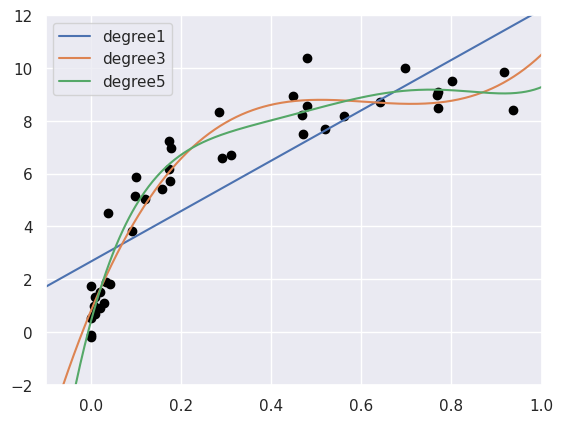

In [14]:
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
X_test = np.linspace(-0.1,1.1,500)[:,None]
plt.scatter(X.ravel(),y,color='black')
axis=plt.axis()
for degree in [1,3,5]:
  y_test=PolynomialRegression(degree).fit(X,y).predict(X_test)
  plt.plot(X_test.ravel(),y_test,label='degree{0}'.format(degree))
plt.xlim(-0.1,1.0)
plt.ylim(-2,12)
plt.legend(loc='best')

In [16]:
# 모든 모델에 적용
# hyper parameter tunning : GridSearchCV
from sklearn.model_selection import GridSearchCV
# 파이프라인의 모델의 구성요소에 대한 튜닝
# 모델의 파라미터 조합을 만들고 -> 최적의 조합을 탐색 -> 데이터는 CV를 이용해서
# 84개의 조합
param_grid={'polynomialfeatures__degree':np.arange(21), # 0~20 : 21개
            'linearregression__fit_intercept':[True,False], # 2개
            # 'linearregression__normalize':[True,False]
            } # 2개
            # GridSearCV 입력되는 모델은 pipeline
grid=GridSearchCV(PolynomialRegression(),param_grid,cv=7)# 84x7

In [17]:
grid.fit(X,y)

GridSearchCV(cv=7,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'linearregression__fit_intercept': [True, False],
                         'polynomialfeatures__degree': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])})

In [18]:
grid.best_params_

{'linearregression__fit_intercept': False, 'polynomialfeatures__degree': 4}

In [23]:
grid.cv_results_['mean_test_score'] # 42개

array([-1.50187129e-01,  6.39753774e-01,  8.62193757e-01,  8.85425576e-01,
        8.97271031e-01,  8.96805045e-01,  8.82212280e-01,  8.84618365e-01,
        8.14681395e-01,  8.85340885e-01, -1.68115162e-01, -3.53640623e+00,
       -6.31933288e+00, -1.00851938e+03, -9.62799816e+02, -7.52062038e+03,
       -4.17017130e+04, -1.38610713e+03, -1.74598673e+08, -5.30520275e+08,
       -1.19808068e+10, -1.50187129e-01,  6.39753774e-01,  8.62193757e-01,
        8.85425576e-01,  8.97271031e-01,  8.96805045e-01,  8.82212280e-01,
        8.84618365e-01,  8.14681395e-01,  8.85340885e-01, -1.68115162e-01,
       -3.53640624e+00, -6.31933315e+00, -1.00851965e+03, -9.62796128e+02,
       -7.52063148e+03, -4.17037438e+04, -1.37960375e+03, -1.73947386e+08,
       -5.15475098e+08, -1.44975758e+09])

In [20]:
grid.best_estimator_

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('linearregression', LinearRegression(fit_intercept=False))])

In [21]:
grid.best_score_ # 90% 

0.8972710305736532

(-0.04687651021505175,
 0.9844070023112612,
 -0.7308177116555796,
 10.902869392322714)

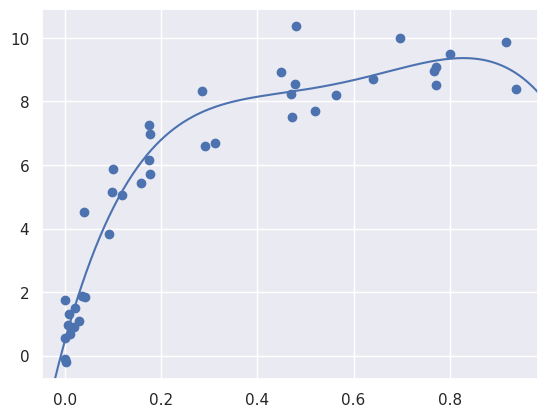

In [22]:
model=grid.best_estimator_

plt.scatter(X.ravel(),y)
lim=plt.axis()
y_test=model.fit(X,y).predict(X_test)
plt.plot(X_test.ravel(),y_test)
plt.axis(lim)

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import pandas as pd
winedf = pd.read_csv('/content/drive/MyDrive/daejeon_1/winequality-red.csv', sep=';')

print(winedf.head(3))
X=winedf.drop(['quality'],axis=1)
Y=winedf['quality'] # 종속변수
# default parameter
# SVM은 kernel -> linear커널, rbf방사형 커널
# C 규제, Gamma 초평면의 모양을 결정
# ML 고차원을 좋아하는 모델 : SVM
# 데이터를 고차원으로 kernel을 이용해서 : xor 문제 
# 신경망 xor 
steps =[('scaler', StandardScaler()), ('SVM', SVC())]
# 파이프라인에서 이름으로 참조하기 위해서
pipeline = Pipeline(steps) # 클래스 인스턴스
parameters = {'SVM__C':[0.001,0.1,10,100,10e5], 'SVM__gamma':[0.1,0.01]}
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=30, stratify=Y)
grid = GridSearchCV(pipeline, param_grid= parameters, cv=5)
grid.fit(X_train, y_train)
print('score = %3.2f' %(grid.score(X_test,y_test)))
print(grid.best_params_)

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
score = 0.67
{'SVM__C': 10, 'SVM__gamma': 0.1}


In [48]:
grid.best_score_

0.6207659313725491

In [ ]:
grid.best_estimator_

In [50]:
!apt-get -qq install -y graphviz && pip install -q pydot

In [51]:
!apt-get install graphviz libgraphviz-dev pkg-config

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pkg-config is already the newest version (0.29.1-0ubuntu4).
graphviz is already the newest version (2.42.2-3build2).
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk libxdot4
0 upgraded, 8 newly installed, 0 to remove and 24 not upgraded.
Need to get 2,148 kB of archives.
After this operation, 7,427 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/main amd64 libgtk2.0-common all 2.24.32-4ubuntu4 [126 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/main amd64 libgtk2.0-0 amd64 2.24.32-4ubuntu4 [1,791 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/main amd64 libgail18 amd6

In [52]:
!pip install pygraphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.6/120.6 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pygraphviz: filename=pygraphviz-1.10-cp310-cp310-linux_x86_64.whl size=184024 sha256=5ecb65c8f93f4d12bec973ad2b9ec1aad37dc5a9b0d3d16d9542b468bbdc8d56
  Stored in directory: /root/.cache/pip/wheels/e9/50/02/d9d68f6c947a928e517d5cd9af0ab007c1274fdba95fa9cbe3
Successfully built pygraphviz


In [68]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn import tree
import matplotlib.pyplot as plt

clf=tree.DecisionTreeClassifier(random_state=0)
iris=load_iris()

[Text(0.5, 0.9166666666666666, 'x[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'x[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini 

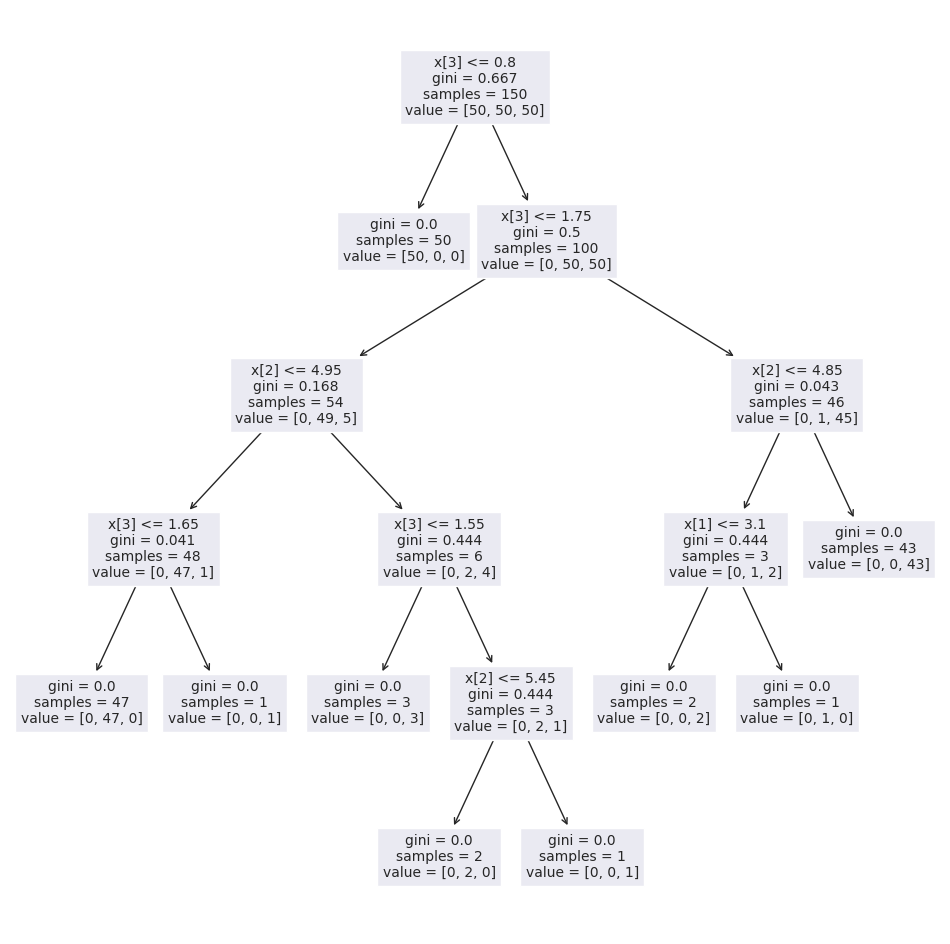

In [69]:
fig,ax=plt.subplots(figsize=(12,12))
clf=clf.fit(iris.data,iris.target)
tree.plot_tree(clf,max_depth=5,fontsize=10)

In [70]:
cross_val_score(clf,iris.data,iris.target,cv=10)

array([1.        , 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.86666667, 0.93333333, 1.        , 1.        , 1.        ])

In [71]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [72]:
clf.get_depth()

5

In [79]:
import pandas as pd
data=pd.DataFrame(iris.data)
print(data.head())
pred=clf.predict(data.iloc[0:150,:])

     0    1    2    3
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2


In [80]:
# 문제 
# 위 데이터에 대하여 accuracy(정분류율)을 출력하시오
# 내가한거
from sklearn.metrics import accuracy_score
predictions=clf.predict(iris.data)
accuracy=accuracy_score(iris.target,predictions)
print('accuracy=', accuracy)
# 수업내용
data=pd.DataFrame(iris.data)
clf.score(data,iris.target)

accuracy_score(pred,iris.target[0:150])

accuracy= 1.0


1.0

In [81]:
# colab에서 matplotlib 한글화할때
!apt-get update -qq
!apt-get install fonts-nanum* -qq
import matplotlib as mpl
import matplotlib.font_manager as fm

fe=fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf',name='NanumGothic')
fm.fontManager.ttflist.insert(0,fe)
plt.rcParams.update({'font.size':18,'font.family':'NanumGothic'})

Selecting previously unselected package fonts-nanum-extra.
(Reading database ... 122675 files and directories currently installed.)
Preparing to unpack .../fonts-nanum-extra_20180306-3_all.deb ...
Unpacking fonts-nanum-extra (20180306-3) ...
Selecting previously unselected package fonts-nanum.
Preparing to unpack .../fonts-nanum_20180306-3_all.deb ...
Unpacking fonts-nanum (20180306-3) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-2_all.deb ...
Unpacking fonts-nanum-coding (2.5-2) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Setting up fonts-nanum-extra (20180306-3) ...
Setting up fonts-nanum (20180306-3) ...
Setting up fonts-nanum-coding (2.5-2) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-2ubuntu3) ...


In [82]:
from sklearn.datasets import make_classification
X,y=make_classification(1000)
print(type(X))
X.shape

<class 'numpy.ndarray'>


(1000, 20)

In [86]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=500)
rf.fit(X,y)
print('Accuracy:\t',(y==rf.predict(X)).mean())

Accuracy:	 1.0


Text(0.5, 1.0, '특성중요도')

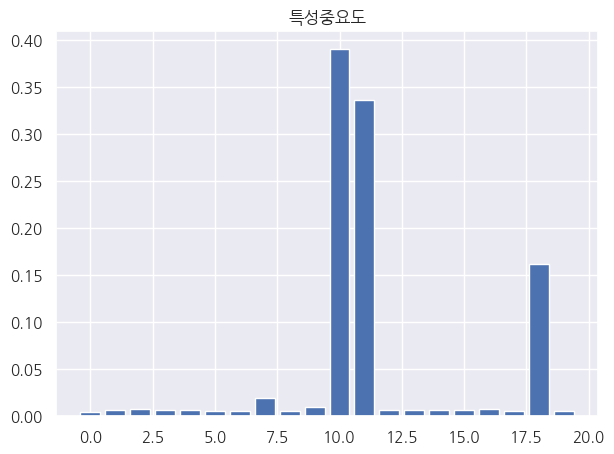

In [87]:
f,ax=plt.subplots(figsize=(7,5))
ax.bar(range(0,len(rf.feature_importances_)),rf.feature_importances_)
ax.set_title('특성중요도')

In [88]:
# sqrt(전체 변수) : 20개의 변수->
# boosting
print('종속변수갯수',rf.n_classes_)
print('클래스종류', rf.classes_)
print('특성수',rf.n_features_in_)
print('모델',rf.estimators_)

종속변수갯수 2
클래스종류 [0 1]
특성수 20
모델 [DecisionTreeClassifier(max_features='sqrt', random_state=5752731), DecisionTreeClassifier(max_features='sqrt', random_state=1663158092), DecisionTreeClassifier(max_features='sqrt', random_state=1538973295), DecisionTreeClassifier(max_features='sqrt', random_state=248418811), DecisionTreeClassifier(max_features='sqrt', random_state=1270085081), DecisionTreeClassifier(max_features='sqrt', random_state=569963251), DecisionTreeClassifier(max_features='sqrt', random_state=1025361250), DecisionTreeClassifier(max_features='sqrt', random_state=2143900525), DecisionTreeClassifier(max_features='sqrt', random_state=1284239311), DecisionTreeClassifier(max_features='sqrt', random_state=883563314), DecisionTreeClassifier(max_features='sqrt', random_state=1111266381), DecisionTreeClassifier(max_features='sqrt', random_state=1512380641), DecisionTreeClassifier(max_features='sqrt', random_state=2086291196), DecisionTreeClassifier(max_features='sqrt', random_state=6571093

# 변수 선택법
- feature_selection: Select_Best, rfe
- tree model의 변수 중요도
- PCA

<class 'numpy.ndarray'>


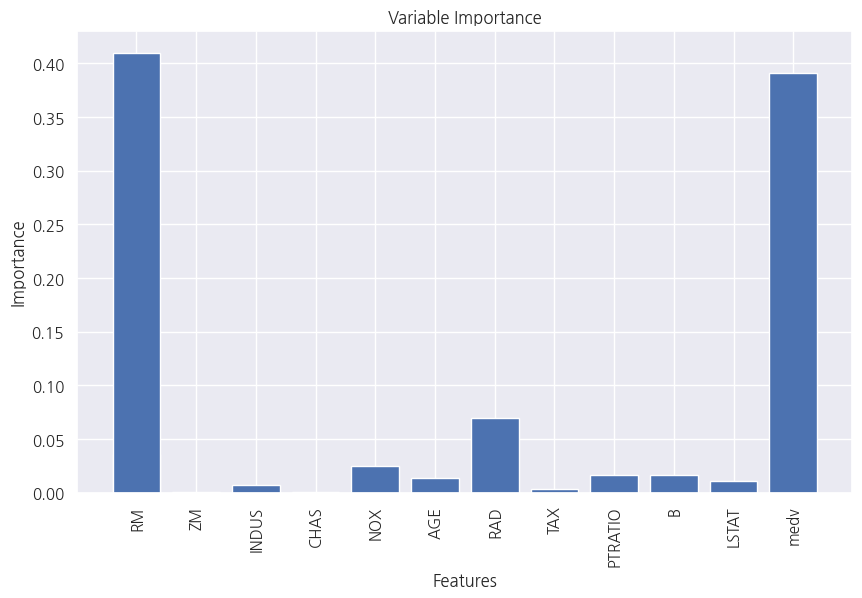

In [101]:
# 문제
# boston데이터를 로딩하고 RandomForestRegressor로 모델을 구성하고 변수중요도를 시각화

# 내가한거

data_url='http://lib.stat.cmu.edu/datasets/boston'
title=['RM','ZM','INDUS','CHAS','NOX','RM','AGE','RAD','TAX','PTRATIO','B','LSTAT','medv']
raw_df=pd.read_csv(data_url,sep='\s+',skiprows=22,header=None)
data=np.hstack([raw_df.values[::2,:],raw_df.values[1::2,:2]])
target=raw_df.values[1::2,2]
print(type(data))
boston_df=pd.DataFrame(data,columns=title)
boston_df.head()

from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(data,target)

# 변수 중요도 추출
importance = rf.feature_importances_

# 변수 중요도 시각화
feature_names = boston_df.columns
plt.figure(figsize=(10, 6))
plt.bar(feature_names, importance)
plt.xticks(rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Variable Importance')
plt.show()

In [106]:
# 수업내용
X=boston_df.iloc[:,:12] # 독립변수
Y=boston_df.iloc[:,12]  # 종속변수

from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X,Y)

RandomForestRegressor()

In [107]:
rf.feature_importances_

array([0.11540105, 0.00142732, 0.18552028, 0.00303725, 0.05425595,
       0.25870843, 0.21077592, 0.08812419, 0.0058147 , 0.00607299,
       0.01996201, 0.0508999 ])

In [108]:
sorted(map(lambda x:round(x,2),rf.feature_importances_))

[0.0, 0.0, 0.01, 0.01, 0.02, 0.05, 0.05, 0.09, 0.12, 0.19, 0.21, 0.26]

In [109]:
sorted(zip(map(lambda x:round(x,2),rf.feature_importances_),title),reverse=True)

[(0.26, 'RM'),
 (0.21, 'AGE'),
 (0.19, 'INDUS'),
 (0.12, 'RM'),
 (0.09, 'RAD'),
 (0.05, 'NOX'),
 (0.05, 'LSTAT'),
 (0.02, 'B'),
 (0.01, 'TAX'),
 (0.01, 'PTRATIO'),
 (0.0, 'ZM'),
 (0.0, 'CHAS')]

Text(0.5, 1.0, 'feature importance')

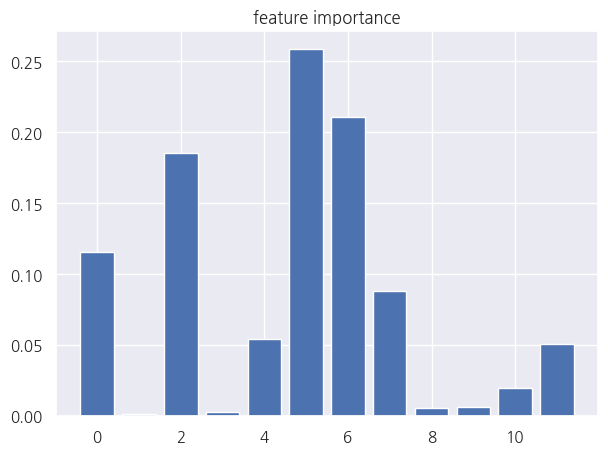

In [110]:
import matplotlib.pyplot as plt
f,ax=plt.subplots(figsize=(7,5))
ax.bar(range(0,len(rf.feature_importances_)),rf.feature_importances_)
ax.set_title('feature importance')

In [111]:
import pandas as pd
res=pd.Series(map(lambda x:round(x,2),rf.feature_importances_),index=title[:12])
res=res.sort_values(ascending=False)

<Axes: >

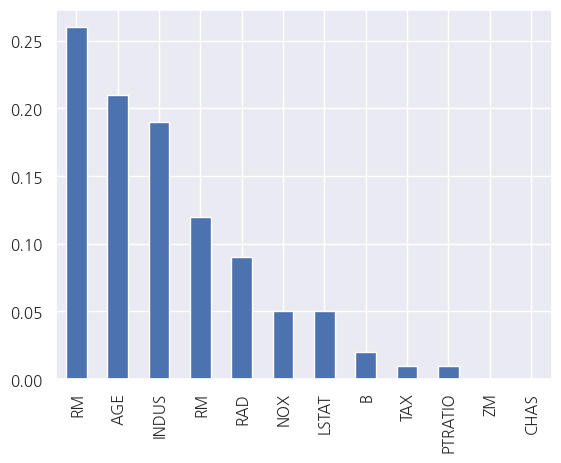

In [112]:
res.plot(kind='bar')

In [113]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,explained_variance_score,max_error

In [114]:
rf.score(X,Y)

0.955997703571329

In [115]:
pred=rf.predict(X)
mean_squared_error(Y,pred)

2.239451965869566

# Bagging
- ensemble
- Bootstrapping
- bagging = bootstrapping + aggregation
  - 열의 조합으로 다양한 데이터를 생성
  - 이유 : 특성선택에 따라서 다양한 결과
  - 가장 좋은데이터: 모든 경우의 수가 있는 데이터
  - 평균(연속적인 데이터) , 투표(다수결의 원칙)
  - 다양한 모델을 base에 선택

  # AdaBoost : Adaptive 적응적으로 - 점차적으로 변환: 잘못된 분류에 대하여 가중치를 조절
  # Gradient Boost : 신경망의 경사하강법처럼 예측치와 실제값의 오차를 점차로 줄여서 Robust한 모델을 생성
  # XGBoost : GB에다 GPU를 추가하고 고유의 데이터포멧을 이용해서 데이터를 처리하는 모델
  # lightGBM : 속도가 빠름 -> 변수의 중요도를 고려해서 실시간으로 데이터를 처리해야 될 경우

In [116]:
from sklearn.datasets import make_moons
X,y=make_moons(n_samples=500,noise=0.3,random_state=42)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [118]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
tree_clf=DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train,y_train)
y_pred_tree=tree_clf.predict(X_test)
print('Accuracy = ',accuracy_score(y_test,y_pred_tree))

Accuracy =  0.856


In [121]:
from sklearn.ensemble import BaggingClassifier
bag_clf=BaggingClassifier(
    DecisionTreeClassifier(random_state=42),n_estimators=500,
    max_samples=100,bootstrap=True,n_jobs=-1,random_state=42
)
bag_clf.fit(X_train,y_train)
y_pred=bag_clf.predict(X_test)
print('Accuracy = ',accuracy_score(y_test,y_pred))

Accuracy =  0.904


In [127]:
from sklearn.svm import SVC
X,y=make_classification(n_samples=100,n_features=4,n_informative=2,
                        n_redundant=0,random_state=0,shuffle=False)
clf=BaggingClassifier(estimator=SVC(),
                      n_estimators=10,random_state=0).fit(X,y)
clf.predict([[0,0,0,0]])

array([1])

In [129]:
# 위의 데이터에 대하여 SVC를 베이스로 accuracy를 출력해보시오
from sklearn.metrics import accuracy_score

# 예측 결과 가져오기
y_pred = clf.predict(X)
# 정확도 계산
accuracy = accuracy_score(y, y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.92


In [132]:
# 문제
# base가 DecisionTreeClassifier 인 BaggingClassifer에 
# DT의 max_depth를 [3,4,5,6]으로 파라미터 튜닝(GridSearchCV)을 실시하시오
# 내가한거
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
bag_clf=BaggingClassifier(
    DecisionTreeClassifier(random_state=42),n_estimators=10,
    max_samples=100,bootstrap=True,n_jobs=-1,random_state=42
)
bag_clf.fit(X_train,y_train)
y_pred=bag_clf.predict(X_test)
print('Accuracy = ',accuracy_score(y_test,y_pred))


param_grid = {'estimator__max_depth': [3, 4, 5, 6]}

grid = GridSearchCV(bag_clf, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)
best_estimator = grid.best_estimator_
y_pred = best_estimator.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy =', accuracy)

Accuracy =  0.912
Accuracy = 0.92


In [133]:
# 수업내용
param_grid={
    'estimator__max_depth':[3,4,5,6],
    'max_samples':[0.01,0.05,0.1,0.2]
}
# 직접 모델을 GridSearchCV에 입력한 경우
clf=GridSearchCV(BaggingClassifier(DecisionTreeClassifier(random_state=42),
                                   n_estimators=10,max_samples=100,bootstrap=True,n_jobs=-1,
                                   random_state=42,max_features=0.5),
                 param_grid)
clf.fit(X_train,y_train)

GridSearchCV(estimator=BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                                         max_features=0.5, max_samples=100,
                                         n_jobs=-1, random_state=42),
             param_grid={'estimator__max_depth': [3, 4, 5, 6],
                         'max_samples': [0.01, 0.05, 0.1, 0.2]})

In [134]:
clf.best_params_

{'estimator__max_depth': 3, 'max_samples': 0.05}

In [135]:
model={'model':BaggingClassifier,
       'kwargs':{'estimator':DecisionTreeClassifier()},
       'parameters':{'name__estimator__max_depth':[3,4,5,6],
                     'name__estimator__max_leaf_nodes':[10,20,30]}}

pipeline=Pipeline([('name',model['model'](**model['kwargs']))])
cv_model=GridSearchCV(pipeline,param_grid=model['parameters'],cv=5)
cv_model.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('name',
                                        BaggingClassifier(estimator=DecisionTreeClassifier()))]),
             param_grid={'name__estimator__max_depth': [3, 4, 5, 6],
                         'name__estimator__max_leaf_nodes': [10, 20, 30]})

In [161]:
from matplotlib.colors import ListedColormap
#모델 : 예측 y값 결정
#도화지 사이즈를 제약 
#겹쳐서 출력 : 투명도 
#contour 등고선 ( 같은 높이는 같은 색으로 )
def plot_decision_boundary(clf,X,y, axes =[-1.5,2.5,-1,1.5], alpha=0.5,
                           contour=True):
  x1s = np.linspace(axes[0],axes[1],100)
  x2s = np.linspace(axes[2],axes[3],100) # 100*100
  x1,x2 = np.meshgrid(x1s,x2s) # 10000개의 정점 
  X_new = np.c_[x1.ravel(), x2.ravel()] # 1차원 
  y_pred = clf.predict(X_new).reshape(x1.shape)
  custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
  plt.contourf(x1,x2,y_pred, alpha=0.3, cmap=custom_cmap) # fill 채워서 등고선을 만들어라 
  if contour:
    custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
    plt.contour(x1,x2,y_pred, cmap=custom_cmap2,alpha=0.8)
  plt.plot(X[:,0][y==0],X[:,1][y==0],'yo',alpha=alpha)
  plt.plot(X[:,0][y==1],X[:,1][y==1],'bs',alpha=alpha)
  plt.axis(axes)
  plt.xlabel(r'$x_1$', fontsize=18)
  plt.ylabel(r'$x_2$', fontsize=18, rotation=0)  

In [ ]:
plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(tree_clf,X,y)
plt.title('DT tree', fontsize=14)
plt.subplot(122)
plot_decision_boundary(bag_clf,X,y)
plt.title('Bagging Tree', fontsize=14)
plt.show()

In [202]:
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [211]:
# 문제
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# iris 데이터로딩
iris=datasets.load_iris()
irisX=pd.DataFrame(iris.data,columns=iris.feature_names)
irisy=pd.DataFrame(iris.target)

In [212]:
# 데이터 분할(train,test)

X_train, X_test, y_train, y_test = train_test_split(irisX, irisy, test_size=0.2, random_state=42)

# 사전에 모델학습이 이루어 져야함(RF)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

<ipython-input-212-e41a7f21dece>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [213]:
# 변수중요도부터 SelectFromModel 함수를 사용해서 변수 선택(threshhold=0.15%)이상만
importances = rf.feature_importances_
  # 변수 선택 객체 초기화
selector = SelectFromModel(rf, threshold=0.15)
  # 변수 선택 수행
selector.fit(X_train, y_train)
  # 선택된 변수들의 인덱스 추출
selected_features = selector.get_support(indices=True)
  # 선택된 변수들의 이름 추출
selected_feature_names = X_train.columns[selected_features]
  # 선택된 변수들 출력
print("Selected Features:",selected_feature_names)

Selected Features: Index(['petal length (cm)', 'petal width (cm)'], dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


In [214]:
# RandomForest를 이용해서 분류한 다음 분류 정확도로 평가하시오
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
  # 정확도 출력
print("분류 정확도:", accuracy)

분류 정확도: 1.0


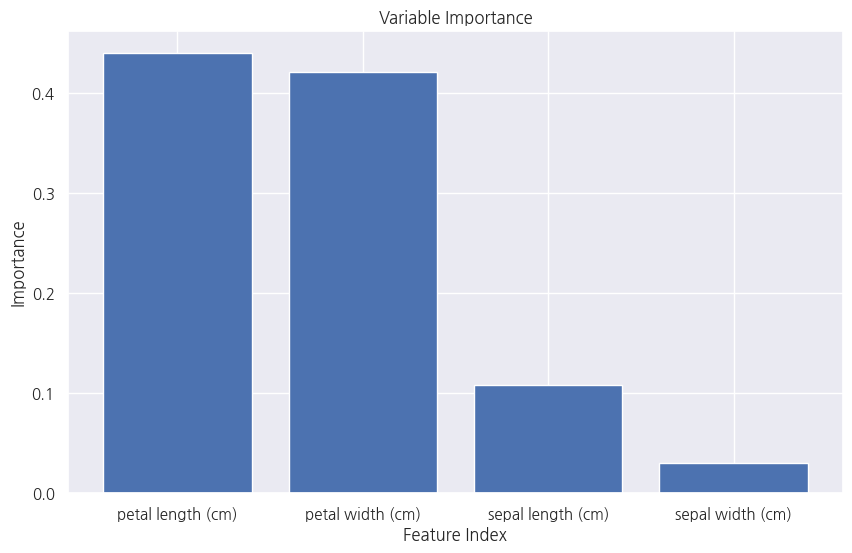

In [215]:
# 변수 중요도를 시각화 하시오
feature_names = ["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]

importances, feature_names = zip(*sorted(zip(importances, feature_names), reverse=True))
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances)
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.title("Variable Importance")
plt.xticks(range(len(importances)), feature_names)
plt.show()


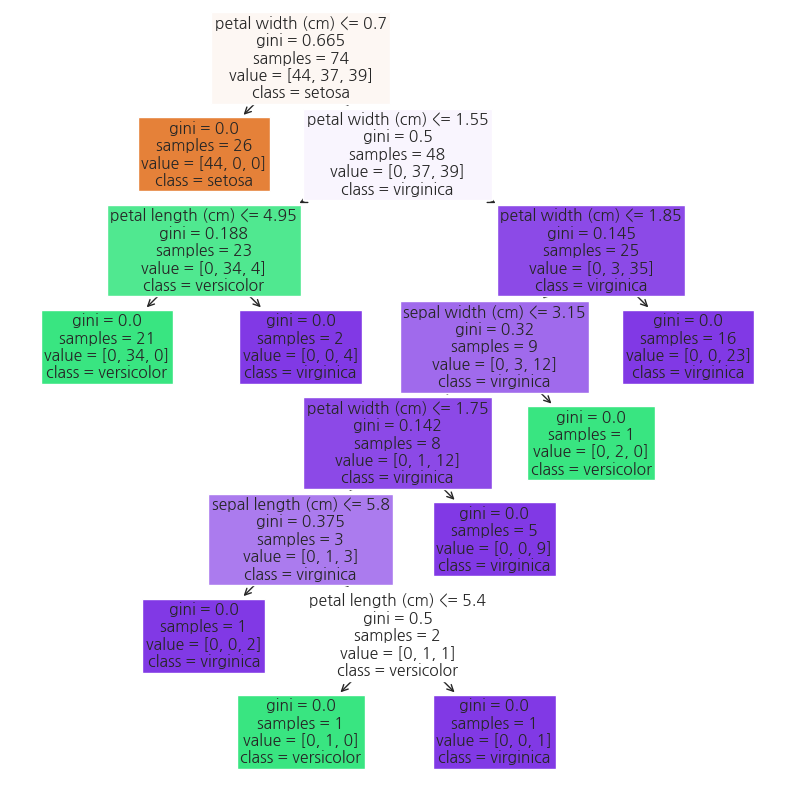

In [219]:
# estimator_[0]을 시각화 # Tree 분류도를 그리시오

from sklearn.tree import plot_tree
plt.figure(figsize=(10,10))
plot_tree(rf.estimators_[0],filled=True,feature_names=iris.feature_names,class_names=iris.target_names)
plt.show()

# from sklearn.tree import export_graphviz
# import graphviz
# # 첫 번째 트리 분류기의 구조를 그래프 형태로 출력

# dot_data = export_graphviz(rf.estimators_[0], out_file=None, feature_names=feature_names,
#                            class_names=iris.target_names, filled=True, rounded=True,
#                            special_characters=True)
# graph = graphviz.Source(dot_data)
# graph.render("tree_classifier")  # 트리 분류기를 이미지 파일로 저장 (옵션)
# graph.view()  # 트리 분류기를 시각화하여 출력

In [217]:
# parameter tunning : max_depth에 대해서 best_param을 결정해보세요

from sklearn.model_selection import GridSearchCV

  # 탐색할 매개변수 그리드 정의
param_grid = {'max_depth': [2, 4, 6, 8, 10]}

  # GridSearchCV를 사용하여 모델과 매개변수 그리드를 설정
grid_search = GridSearchCV(rf, param_grid, cv=5)

  # 모델 훈련 및 최적의 매개변수 선택
grid_search.fit(X_train, y_train)

  # 최적의 매개변수 및 최고 성능 출력
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

Best Parameters:  {'max_depth': 4}
Best Score:  0.95


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
